In [1]:
import arviz as az
import bambi as bmb
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from bambi.plots import plot_cap
import importlib
import sys
%load_ext autoreload
%autoreload 2

In [2]:
data = pd.read_csv("data/mtcars.csv")
data["cyl"] = data["cyl"].replace({4: "low", 6: "medium", 8: "high"})
data["gear"] = data["gear"].replace({3: "A", 4: "B", 5: "C"})
data["cyl"] = pd.Categorical(data["cyl"], categories=["low", "medium", "high"], ordered=True)

model = bmb.Model("mpg ~ 0 + hp * wt + cyl + gear", data)
idata = model.fit(draws=1000, target_accept=0.95, random_seed=1234)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mpg_sigma, hp, wt, hp:wt, cyl, gear]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 17 seconds.


In [3]:
#model.data

In [4]:
idata

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data

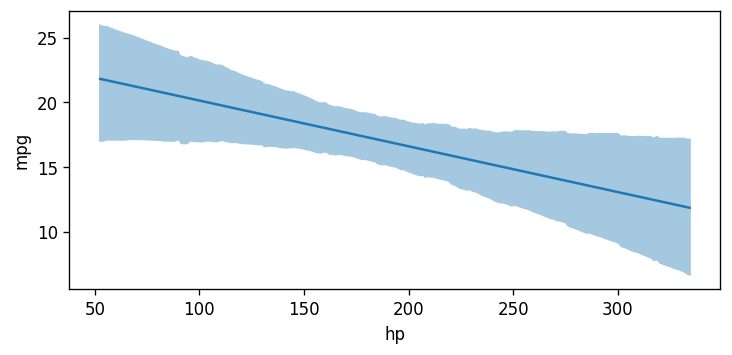

In [6]:
fig, ax = plt.subplots(figsize=(7, 3), dpi=120)
(fig, ax), pps, cap_data = plot_cap(
    model, idata, "hp", pps=True, ax=ax
);

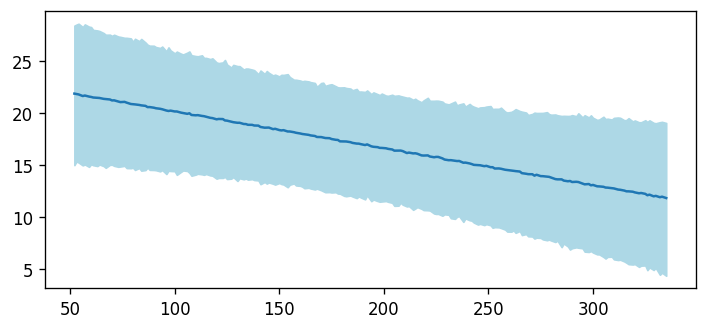

In [17]:
# posterior predictive distribution (forward sampling)
# i.e., plot_cap at observation level
fig, ax = plt.subplots(figsize=(7, 3), dpi=120)
plt.plot(
    cap_data["hp"],
    pps['posterior_predictive']['mpg'].mean(('chain', 'draw'))
)
plt.fill_between(
    x=cap_data["hp"],
    y1=pps['posterior_predictive']['mpg'].quantile(0.025, ('chain', 'draw')),
    y2=pps['posterior_predictive']['mpg'].quantile(0.975, ('chain', 'draw')),
    color="lightblue"
);

In [8]:
cap_data

,hp,wt,cyl,gear
0,52,3.21725,high,A
1,53,3.21725,high,A
2,54,3.21725,high,A
3,56,3.21725,high,A
4,57,3.21725,high,A
...,...,...,...,...
195,329,3.21725,high,A
196,330,3.21725,high,A
197,332,3.21725,high,A
198,333,3.21725,high,A


In [12]:
pps['posterior_predictive']['mpg'].mean(('chain', 'draw'))

<xarray.DataArray 'mpg' (mpg_obs: 200)>
array([21.77328205, 21.75429302, 21.75015065, 21.71817842, 21.64613765,
       21.58779738, 21.56237658, 21.55033089, 21.44261883, 21.40085415,
       21.37342827, 21.27034257, 21.25109412, 21.19067472, 21.1384935 ,
       21.06546649, 21.06242881, 21.01921592, 20.94234442, 20.8999071 ,
       20.82040692, 20.85453948, 20.78778288, 20.66431695, 20.63466151,
       20.56513859, 20.5441038 , 20.464081  , 20.49722804, 20.37147149,
       20.33584592, 20.2557482 , 20.29896622, 20.21833974, 20.18630047,
       20.04378052, 20.04028697, 20.02511541, 19.93717582, 19.92753772,
       19.89570078, 19.75259372, 19.8281578 , 19.75347577, 19.65200963,
       19.64728085, 19.52477021, 19.44597552, 19.45177413, 19.37332307,
       19.36787548, 19.27793716, 19.25047879, 19.21095954, 19.18244104,
       19.08073446, 19.09735844, 18.94172843, 18.94862873, 18.9097839 ,
       18.81408095, 18.75792274, 18.75401178, 18.61096295, 18.68207151,
       18.6307348 , 18.57286015, 18.51276696, 18.3691676 , 18.42435556,
       18.30068138, 18.31322263, 18.33336601, 18.25375789, 18.19406352,
       18.12248872, 18.01384679, 18.01229386, 17.92330878, 17.8821393 ,
       17.81100368, 17.75094282, 17.74831301, 17.69400063, 17.66531534,
       17.61702594, 17.47688895, 17.42509945, 17.4381858 , 17.34997228,
       17.33928922, 17.26237147, 17.16186216, 17.19077075, 17.09931796,
       17.09216885, 17.01975131, 17.00812588, 16.89289105, 16.91165243,
       16.86074552, 16.81622585, 16.70514748, 16.67127863, 16.61794464,
       16.58238906, 16.56039563, 16.44777179, 16.43511879, 16.34871853,
       16.32781671, 16.3157639 , 16.27085348, 16.15901296, 16.14816037,
       16.11629867, 16.00142289, 16.01352696, 15.91139661, 15.86741994,
       15.78862767, 15.75852903, 15.68976542, 15.70894338, 15.61713722,
       15.5801808 , 15.43881767, 15.46810199, 15.45715393, 15.35298314,
       15.36436662, 15.22528723, 15.20855618, 15.10489353, 15.12064643,
       15.08787615, 15.02644561, 15.00907036, 14.90288816, 14.86510184,
       14.83435457, 14.74285852, 14.71836834, 14.70759099, 14.54963342,
       14.56273024, 14.46847902, 14.42729447, 14.4267451 , 14.44896133,
       14.36348742, 14.17534087, 14.15677899, 14.22164071, 14.15006815,
       14.01880349, 14.02145857, 13.94650924, 13.92532048, 13.78302725,
       13.79539493, 13.76753538, 13.70679106, 13.67492215, 13.61410476,
       13.53678754, 13.51814305, 13.44425665, 13.4650309 , 13.36050581,
       13.28284163, 13.29263203, 13.1810348 , 13.12952363, 13.08871855,
       13.00385808, 12.9830582 , 12.89509411, 12.90646495, 12.90975526,
       12.82767124, 12.75762943, 12.76465301, 12.66381213, 12.67277787,
       12.56404929, 12.48981878, 12.45732784, 12.42552258, 12.40691674,
       12.32148184, 12.27211214, 12.18055399, 12.19815691, 12.10672955,
       12.09135056, 12.02496374, 11.95250967, 11.92425349, 11.84388805])
Coordinates:
  * mpg_obs  (mpg_obs) int64 0 1 2 3 4 5 6 7 ... 192 193 194 195 196 197 198 199

In [19]:
pps['posterior']

<xarray.Dataset>
Dimensions:    (chain: 4, draw: 1000, cyl_dim: 3, gear_dim: 2, mpg_obs: 200)
Coordinates:
  * chain      (chain) int64 0 1 2 3
  * draw       (draw) int64 0 1 2 3 4 5 6 7 ... 992 993 994 995 996 997 998 999
  * cyl_dim    (cyl_dim) <U6 'low' 'medium' 'high'
  * gear_dim   (gear_dim) <U1 'B' 'C'
  * mpg_obs    (mpg_obs) int64 0 1 2 3 4 5 6 7 ... 193 194 195 196 197 198 199
Data variables:
    hp         (chain, draw) float64 -0.07071 -0.07082 ... -0.1352 -0.08599
    wt         (chain, draw) float64 -4.84 -5.009 -6.231 ... -7.9 -8.461 -4.432
    hp:wt      (chain, draw) float64 0.01482 0.01484 0.02625 ... 0.03348 0.01707
    cyl        (chain, draw, cyl_dim) float64 38.35 36.38 36.95 ... 37.6 36.28
    gear       (chain, draw, gear_dim) float64 1.593 3.538 1.495 ... 1.097 1.757
    mpg_sigma  (chain, draw) float64 1.84 1.798 2.658 ... 2.821 2.903 1.919
    mpg_mean   (chain, draw, mpg_obs) float64 20.18 20.16 20.14 ... 11.67 11.61
Attributes:
    created_at:                  2023-04-15T19:56:55.172115
    arviz_version:               0.15.1
    inference_library:           pymc
    inference_library_version:   5.2.0
    sampling_time:               17.610633850097656
    tuning_steps:                1000
    modeling_interface:          bambi
    modeling_interface_version:  0.10.0.dev

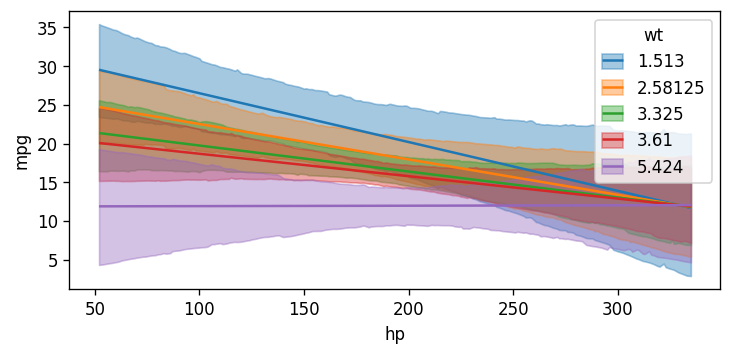

In [11]:
fig, ax = plt.subplots(figsize=(7, 3), dpi=120)
plot_cap(model, idata, ["hp", "wt"], ax=ax);

## Logistic Regression

In [15]:
data = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/ggplot2movies/movies.csv")

data["style"] = "Other"
data.loc[data["Action"] == 1, "style"] = "Action"
data.loc[data["Comedy"] == 1, "style"] = "Comedy"
data.loc[data["Drama"] == 1, "style"] = "Drama"
data["certified_fresh"] = (data["rating"] >= 8) * 1
data = data[data["length"] < 240]

priors = {"style": bmb.Prior("Normal", mu=0, sigma=2)}
model = bmb.Model("certified_fresh ~ 0 + length * style", data=data, priors=priors, family="bernoulli")
model

       Formula: certified_fresh ~ 0 + length * style
        Family: bernoulli
          Link: p = logit
  Observations: 58662
        Priors: 
    target = p
        Common-level effects
            length ~ Normal(mu: 0.0, sigma: 0.0708)
            style ~ Normal(mu: 0.0, sigma: 2.0)
            length:style ~ Normal(mu: [0. 0. 0.], sigma: [0.0702 0.0509 0.0611])

In [14]:
idata = model.fit(random_seed=1234, target_accept=0.9, init="adapt_diag")

Modeling the probability that certified_fresh==1
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [length, style, length:style]


EOFError: 

In [ ]:
fig, ax = plt.subplots(figsize=(7, 5), dpi=120, tight_layout=True)
plot_cap(model, idata, "length", ax=ax)